# <b><font color="blue"> Exploratory Data Analysis of the NYPD Data Set</b></font>
To predict LAW_CAT_CD, also known as OFFENSE_LEVEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b>Import Packages

In [2]:
import os

# Load the data using os.path.join
df = pd.read_csv(os.path.join('NYPD_Arrest_Data__Year_to_Date__20241023.csv'))
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [3]:
original_shape = df.shape
original_shape

(195447, 19)

## <b>Type Formatting

In [4]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [5]:
# convert the 'ARREST_DATE' column to datetime format
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [6]:
# make sure there aren't duplicate ARREST_KEYs
keys = df['ARREST_KEY'].nunique()
numbers = df.shape[0]
numbers == keys

True

In [7]:
# check if any decimal values in the 'PD_CD' column
for i in df['PD_CD']:
    if i % 1 != 0:
        print(i)
# okay we can safely convert to int or categorical after dropping null values

nan
nan
nan
nan
nan
nan


In [8]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,2024-01-28,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,2024-02-27,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,2024-03-03,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,2024-05-16,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,2024-06-02,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)


In [9]:
for col in df.columns:
    print(col, ":", df[col].nunique(), ":", df[col].dtype)

ARREST_KEY : 195447 : int64
ARREST_DATE : 274 : datetime64[ns]
PD_CD : 262 : float64
PD_DESC : 252 : object
KY_CD : 69 : float64
OFNS_DESC : 59 : object
LAW_CODE : 1049 : object
LAW_CAT_CD : 6 : object
ARREST_BORO : 5 : object
ARREST_PRECINCT : 77 : int64
JURISDICTION_CODE : 25 : int64
AGE_GROUP : 5 : object
PERP_SEX : 2 : object
PERP_RACE : 7 : object
X_COORD_CD : 27815 : int64
Y_COORD_CD : 29459 : int64
Latitude : 33788 : float64
Longitude : 33815 : float64
New Georeferenced Column : 34621 : object


In [10]:
#rename LAW_CAT_CD to OFFENSE_Level
df.rename(columns={'LAW_CAT_CD':'OFFENSE_LEVEL'}, inplace=True)

## <b>Null Values

In [11]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          6
PD_DESC                        0
KY_CD                         26
OFNS_DESC                      0
LAW_CODE                       0
OFFENSE_LEVEL               1109
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [12]:
# We'll just drop the nan since the max NaNs is 1109 (max being sum of all nan which is 1,141) -- which is less than 1% of the data.
# drop Nan values from the dataset
df.dropna(inplace=True)
df.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
OFFENSE_LEVEL               0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [13]:
# convert the 'PD_CD' column to integer format
df['PD_CD'] = df['PD_CD'].astype(int)
df['KY_CD'] = df['KY_CD'].astype(int)

In [14]:
for col in df.columns:
    print(col, ":", df[col].nunique(), ":", df[col].dtype)

# will do season based analysis
# drop PD_DESC
# encode ARREST_BORO
# dropping null values did change the unique values of some columns a lot so might play into factor later

ARREST_KEY : 194312 : int64
ARREST_DATE : 274 : datetime64[ns]
PD_CD : 251 : int64
PD_DESC : 243 : object
KY_CD : 68 : int64
OFNS_DESC : 57 : object
LAW_CODE : 1036 : object
OFFENSE_LEVEL : 5 : object
ARREST_BORO : 5 : object
ARREST_PRECINCT : 77 : int64
JURISDICTION_CODE : 25 : int64
AGE_GROUP : 5 : object
PERP_SEX : 2 : object
PERP_RACE : 7 : object
X_COORD_CD : 27757 : int64
Y_COORD_CD : 29401 : int64
Latitude : 33710 : float64
Longitude : 33740 : float64
New Georeferenced Column : 34537 : object


In [15]:
# get count of 0,1,2 from jurisdiction code
df['JURISDICTION_CODE'].value_counts()
# Jurisdiction responsible for arrest. Jurisdiction codes 0,1,2 represent NYPD
# 0: Patrol
# 1: Transit
# 2: Housing
# codes 3 and more represent non NYPD jurisdictions

JURISDICTION_CODE
0     167801
1      13983
2       7377
3       1629
17      1571
72       427
97       366
73       264
11       221
51       151
87       105
7         94
71        86
14        85
4         60
52        33
88        13
69        10
13         9
16         7
12         7
85         5
79         5
74         2
76         1
Name: count, dtype: int64

In [16]:
sum_012 = int(df['JURISDICTION_CODE'].value_counts().loc[[0,1,2]].sum())
print(sum_012)

ratio = sum_012/df.shape[0]
print(ratio)

# maybe drop non NYPD jurisdiction codes?
# and encode the rest as 0,1,2?

189161
0.9734910865000618


In [17]:
df['LAW_CODE'].value_counts()

LAW_CODE
PL 1200001    20812
PL 1552500    19904
PL 1651503     8118
VTL0511001     6483
PL 215510B     6386
              ...  
VTL1192U4A        1
PL 2406006        1
PL 1902504        1
VTL0375030        1
PL 2404501        1
Name: count, Length: 1036, dtype: int64

In [18]:
# replace space with - in Law Code
df['LAW_CODE'] = df['LAW_CODE'].str.replace(' ', '-')

In [19]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
25-44    112844
45-64     37791
18-24     32979
<18        7243
65+        3455
Name: count, dtype: int64

In [20]:
# drop rows without M, F, V in OFFENSE_LEVEL
df = df[df['OFFENSE_LEVEL'].isin(['M', 'F', 'V'])]
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


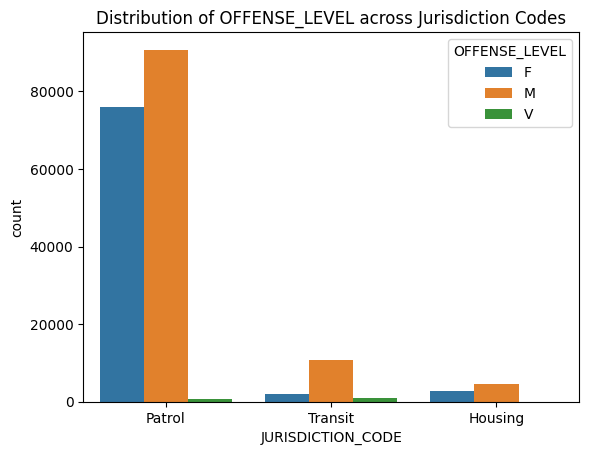

In [21]:
# make a visual of the distribution of OFFENSE_LEVEL across the jurisdiction codes 0,1,2

# select only the rows with jurisdiction codes 0,1,2
df_juris = df[df['JURISDICTION_CODE'].isin([0,1,2])]
sns.countplot(x='JURISDICTION_CODE', data=df_juris, hue='OFFENSE_LEVEL')
plt.title('Distribution of OFFENSE_LEVEL across Jurisdiction Codes')
# assign ['Patrol', 'Transit', 'Housing'] to x-axis
plt.xticks(ticks=[0,1,2], labels=['Patrol', 'Transit', 'Housing'])
plt.show()

In [22]:
df['ARREST_BORO'].value_counts()

ARREST_BORO
K    53743
M    45597
B    43613
Q    42350
S     8307
Name: count, dtype: int64

In [23]:
df['OFFENSE_LEVEL'].value_counts()

OFFENSE_LEVEL
M    109326
F     82522
V      1762
Name: count, dtype: int64

In [24]:
(df['OFFENSE_LEVEL'].value_counts()/ df['OFFENSE_LEVEL'].value_counts().sum()) * 100

OFFENSE_LEVEL
M    56.467125
F    42.622798
V     0.910077
Name: count, dtype: float64

In [25]:
# dropped NaN value, dropped rows with OFFENSE_LEVEL not in ['M', 'F', 'V']
print(df.shape)
print(original_shape)

(193610, 19)
(195447, 19)


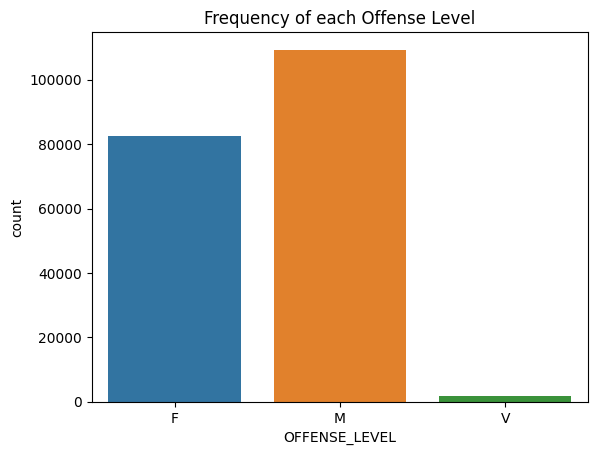

In [26]:
# plot frequency of each offense level
sns.countplot(x='OFFENSE_LEVEL', data=df, hue='OFFENSE_LEVEL')
plt.title('Frequency of each Offense Level')
plt.show()
# color the bars

### Time to drop columns

In [27]:
df_map = df.copy()
# make a copy of the dataframe for map visualization later

In [29]:
# drop ARREST_KEY, X_COORD_CD, Y_COORD_CD, New Georeferenced Column, PD_DESC, PD_CD
df.drop(columns=['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column'], inplace=True)
df

/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_25710/93140841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column'], inplace=True)


,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,40.737043,-73.735514
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,40.732881,-73.807899
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,40.855109,-73.892818
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,40.628967,-74.163275
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,40.591980,-73.800066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,40.786116,-73.942614
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,40.827812,-73.925929


In [30]:
df_heat = df.copy()
df_heat.drop(columns=['ARREST_DATE','LAW_CODE','ARREST_BORO','AGE_GROUP','PERP_RACE','PERP_SEX'], inplace=True)

In [31]:
df_heat['OFFENSE_LEVEL'] = df_heat['OFFENSE_LEVEL'].astype('category')
df_heat['PD_DESC'] = df_heat['PD_DESC'].astype('category')
df_heat['OFNS_DESC'] = df_heat['OFNS_DESC'].astype('category')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_heat['PD_DESC'] = le.fit_transform(df_heat['PD_DESC'])
df_heat['OFNS_DESC'] = le.fit_transform(df_heat['OFNS_DESC'])
df_heat['OFFENSE_LEVEL'] = le.fit_transform(df_heat['OFFENSE_LEVEL'])

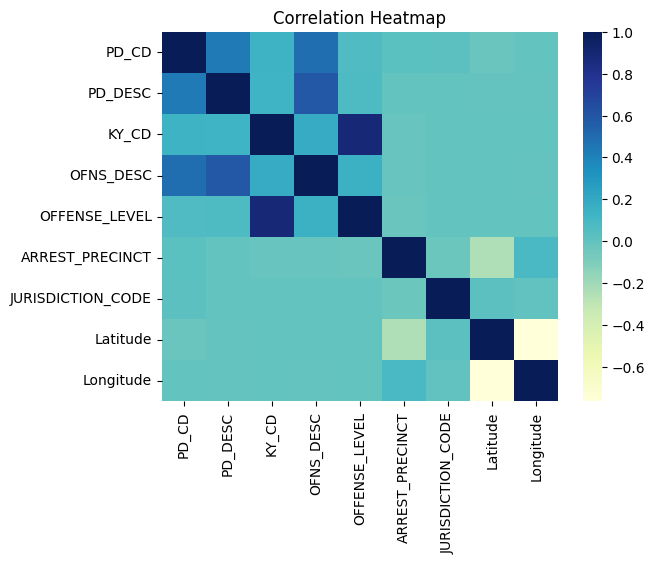

In [61]:
# create a heatmap with spectral color map

sns.heatmap(df_heat.corr(), annot=False, color='blue', cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# make a sctter plot of ARREST_date vs PD_DESC
plt.scatter(df['ARREST_DATE'], df['PD_DESC'])
#plt.scatter(df['OFFENSE_LEVEL'], df['PD_DESC'])


KeyError: 'ARREST_DATE'

### One hot encoding and extra DFs

In [33]:
# one hot encode ARREST_BORO
df = pd.get_dummies(df, columns=['ARREST_BORO'])
df

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,105,0,25-44,M,WHITE,40.737043,-73.735514,False,False,False,True,False
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,107,71,45-64,M,WHITE,40.732881,-73.807899,False,False,False,True,False
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,48,0,25-44,M,BLACK,40.855109,-73.892818,True,False,False,False,False
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,121,0,25-44,M,WHITE,40.628967,-74.163275,False,False,False,False,True
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,100,0,25-44,M,BLACK,40.591980,-73.800066,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115,False,False,False,True,False
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265,False,False,True,False,False
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,23,0,45-64,M,WHITE,40.786116,-73.942614,False,False,True,False,False
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,44,1,25-44,M,BLACK,40.827812,-73.925929,True,False,False,False,False


In [34]:
# convert KY_CD to categorical type
df['KY_CD'] = df['KY_CD'].astype('category')
df['PD_CD'] = df['PD_CD'].astype('category')

In [35]:
#df["OFNS_DESC"].value_counts()

In [36]:
# make two datasets, one with demographic data and one without
df_demo = df.copy()
# map the age groups to numerical values

In [37]:
df.columns

Index(['ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE',
       'OFFENSE_LEVEL', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude', 'ARREST_BORO_B',
       'ARREST_BORO_K', 'ARREST_BORO_M', 'ARREST_BORO_Q', 'ARREST_BORO_S'],
      dtype='object')

In [38]:
df.drop(columns=['LAW_CODE','AGE_GROUP', 'PERP_SEX','PERP_RACE'], inplace=True)
df

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,105,0,40.737043,-73.735514,False,False,False,True,False
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,F,107,71,40.732881,-73.807899,False,False,False,True,False
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,48,0,40.855109,-73.892818,True,False,False,False,False
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,121,0,40.628967,-74.163275,False,False,False,False,True
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,100,0,40.591980,-73.800066,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,M,109,0,40.757691,-73.834115,False,False,False,True,False
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,M,34,0,40.856808,-73.928265,False,False,True,False,False
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,F,23,0,40.786116,-73.942614,False,False,True,False,False
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,M,44,1,40.827812,-73.925929,True,False,False,False,False


# <b>MODELING

In [39]:
# add a column for season and month and drop ARREST_DATE
df['MONTH'] = df['ARREST_DATE'].dt.month

df['SEASON'] = df['MONTH'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Fall')

df.drop(columns=['ARREST_DATE'], inplace=True)
# make month and season columns categorical
df['MONTH'] = df['MONTH'].astype('category')
df['SEASON'] = df['SEASON'].astype('category')

## <b> MAIN DATASET

In [40]:
df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON
0,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,105,0,40.737043,-73.735514,False,False,False,True,False,1,Winter
1,263,"ARSON 2,3,4",114,ARSON,F,107,71,40.732881,-73.807899,False,False,False,True,False,2,Winter
2,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,48,0,40.855109,-73.892818,True,False,False,False,False,3,Spring
3,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,121,0,40.628967,-74.163275,False,False,False,False,True,5,Spring
4,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,100,0,40.591980,-73.800066,False,False,False,True,False,6,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,M,109,0,40.757691,-73.834115,False,False,False,True,False,9,Fall
195443,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,M,34,0,40.856808,-73.928265,False,False,True,False,False,9,Fall
195444,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,F,23,0,40.786116,-73.942614,False,False,True,False,False,9,Fall
195445,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,M,44,1,40.827812,-73.925929,True,False,False,False,False,9,Fall


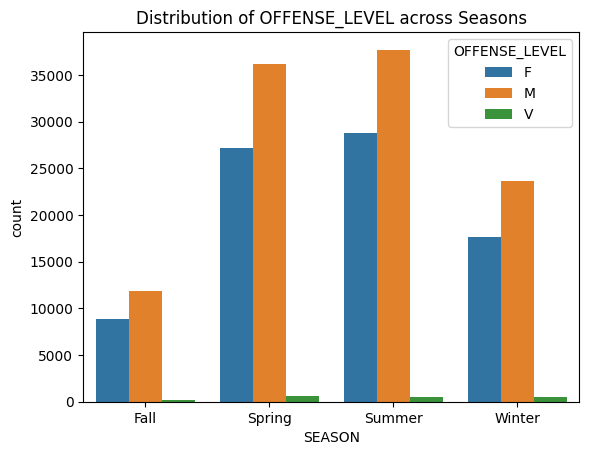

SEASON
Summer    66997
Spring    63941
Winter    41757
Fall      20915
Name: count, dtype: int64

In [41]:
# do vizualization on season vs OFFENSE_LEVEL
sns.countplot(x='SEASON', data=df, hue='OFFENSE_LEVEL')
plt.title('Distribution of OFFENSE_LEVEL across Seasons')
plt.show()

df['SEASON'].value_counts()


In [42]:
# one hot encode season 
df = pd.get_dummies(df, columns=['SEASON'])

In [43]:
# make OFFENSE_LEVEL categorical
df['OFFENSE_LEVEL'] = df['OFFENSE_LEVEL'].astype('category')
df['PD_DESC'] = df['PD_DESC'].astype('category')
df['OFNS_DESC'] = df['OFNS_DESC'].astype('category')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PD_DESC'] = le.fit_transform(df['PD_DESC'])
df['OFNS_DESC'] = le.fit_transform(df['OFNS_DESC'])
df['OFFENSE_LEVEL'] = le.fit_transform(df['OFFENSE_LEVEL'])

In [44]:
df.corr()

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
PD_CD,1.000000,0.436869,0.135129,0.489381,0.063502,0.025078,0.016965,-0.024564,-0.003769,-0.022669,0.033483,-0.020137,-0.010442,0.036208,-0.024575,-0.006041,-0.001793,-0.017910,0.027325
PD_DESC,0.436869,1.000000,0.126219,0.589284,0.071438,-0.004114,-0.000438,-0.010594,-0.008547,0.004149,0.032287,-0.012876,-0.033386,0.015164,-0.003346,0.003556,-0.007483,-0.003937,0.010427
KY_CD,0.135129,0.126219,1.000000,0.185502,0.886216,-0.017573,-0.000975,-0.002356,-0.005792,0.009839,-0.006831,0.010372,-0.019628,0.013134,-0.013473,-0.002649,0.000935,-0.011185,0.013867
OFNS_DESC,0.489381,0.589284,0.185502,1.000000,0.148063,-0.015870,-0.004567,-0.002616,-0.009227,-0.002939,-0.012125,0.017694,-0.007858,0.011836,-0.010202,-0.001457,-0.002434,-0.007814,0.012920
OFFENSE_LEVEL,0.063502,0.071438,0.886216,0.148063,1.000000,-0.023586,-0.003931,-0.000160,-0.005956,0.003970,-0.019772,0.024067,-0.011674,0.008928,-0.007853,-0.000677,0.000699,-0.006727,0.007492
ARREST_PRECINCT,0.025078,-0.004114,-0.017573,-0.015870,-0.023586,1.000000,-0.033059,-0.242879,0.084188,-0.287425,0.175098,-0.725035,0.674524,0.347730,0.003745,-0.003404,-0.004752,0.009297,-0.002750
JURISDICTION_CODE,0.016965,-0.000438,-0.000975,-0.004567,-0.003931,-0.033059,1.000000,0.016543,0.005989,0.035856,-0.035650,0.017290,-0.007602,-0.015834,-0.003598,-0.000914,0.005795,-0.005197,0.000075
Latitude,-0.024564,-0.010594,-0.002356,-0.002616,-0.000160,-0.242879,0.016543,1.000000,-0.764876,0.370793,-0.316247,0.117607,-0.068924,-0.171199,0.006203,0.004703,-0.000904,0.002352,-0.005236
Longitude,-0.003769,-0.008547,-0.005792,-0.009227,-0.005956,0.084188,0.005989,-0.764876,1.000000,0.067154,-0.062223,-0.104485,0.188149,-0.165976,0.000287,0.000960,-0.005856,0.001243,0.004534
ARREST_BORO_B,-0.022669,0.004149,0.009839,-0.002939,0.003970,-0.287425,0.035856,0.370793,0.067154,1.000000,-0.334249,-0.299285,-0.285319,-0.114169,0.004580,0.007952,-0.004350,-0.001115,0.000262


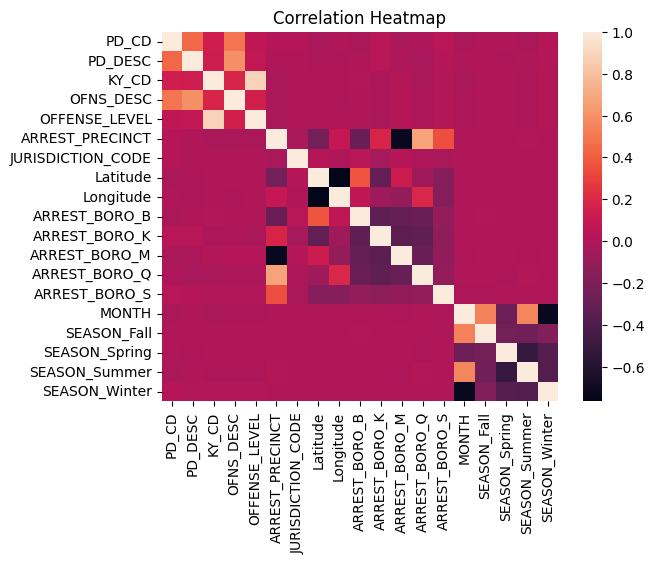

In [45]:
# create a heatmap
sns.heatmap(df.corr(), annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [46]:
df_no_codes = df.copy()
df_no_desc = df.copy()

In [47]:
df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,105,206,106,17,0,105,0,40.737043,-73.735514,False,False,False,True,False,1,False,False,False,True
1,263,16,114,4,0,107,71,40.732881,-73.807899,False,False,False,True,False,2,False,False,False,True
2,109,17,106,17,0,48,0,40.855109,-73.892818,True,False,False,False,False,3,False,True,False,False
3,109,17,106,17,0,121,0,40.628967,-74.163275,False,False,False,False,True,5,False,True,False,False
4,105,206,106,17,0,100,0,40.591980,-73.800066,False,False,False,True,False,6,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,40.757691,-73.834115,False,False,False,True,False,9,True,False,False,False
195443,101,18,344,5,1,34,0,40.856808,-73.928265,False,False,True,False,False,9,True,False,False,False
195444,244,29,107,7,0,23,0,40.786116,-73.942614,False,False,True,False,False,9,True,False,False,False
195445,478,211,343,43,1,44,1,40.827812,-73.925929,True,False,False,False,False,9,True,False,False,False


## <b> DF_no_codes

In [48]:
df_no_codes.drop(columns=['KY_CD', 'PD_CD'], inplace=True)

In [49]:
df_no_codes

,PD_DESC,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,206,17,0,105,0,40.737043,-73.735514,False,False,False,True,False,1,False,False,False,True
1,16,4,0,107,71,40.732881,-73.807899,False,False,False,True,False,2,False,False,False,True
2,17,17,0,48,0,40.855109,-73.892818,True,False,False,False,False,3,False,True,False,False
3,17,17,0,121,0,40.628967,-74.163275,False,False,False,False,True,5,False,True,False,False
4,206,17,0,100,0,40.591980,-73.800066,False,False,False,True,False,6,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,124,47,1,109,0,40.757691,-73.834115,False,False,False,True,False,9,True,False,False,False
195443,18,5,1,34,0,40.856808,-73.928265,False,False,True,False,False,9,True,False,False,False
195444,29,7,0,23,0,40.786116,-73.942614,False,False,True,False,False,9,True,False,False,False
195445,211,43,1,44,1,40.827812,-73.925929,True,False,False,False,False,9,True,False,False,False


## <b> DF_no_desc

In [50]:
df_no_desc.drop(columns=['OFNS_DESC', 'PD_DESC'], inplace=True)

In [51]:
df_no_desc

,PD_CD,KY_CD,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,105,106,0,105,0,40.737043,-73.735514,False,False,False,True,False,1,False,False,False,True
1,263,114,0,107,71,40.732881,-73.807899,False,False,False,True,False,2,False,False,False,True
2,109,106,0,48,0,40.855109,-73.892818,True,False,False,False,False,3,False,True,False,False
3,109,106,0,121,0,40.628967,-74.163275,False,False,False,False,True,5,False,True,False,False
4,105,106,0,100,0,40.591980,-73.800066,False,False,False,True,False,6,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,341,1,109,0,40.757691,-73.834115,False,False,False,True,False,9,True,False,False,False
195443,101,344,1,34,0,40.856808,-73.928265,False,False,True,False,False,9,True,False,False,False
195444,244,107,0,23,0,40.786116,-73.942614,False,False,True,False,False,9,True,False,False,False
195445,478,343,1,44,1,40.827812,-73.925929,True,False,False,False,False,9,True,False,False,False


## <b> DF_no_pd

In [52]:
df_no_pd= df_no_desc.copy()

In [53]:
df_no_pd.drop(columns=['PD_CD'], inplace=True)

In [54]:
df_no_pd

,KY_CD,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,106,0,105,0,40.737043,-73.735514,False,False,False,True,False,1,False,False,False,True
1,114,0,107,71,40.732881,-73.807899,False,False,False,True,False,2,False,False,False,True
2,106,0,48,0,40.855109,-73.892818,True,False,False,False,False,3,False,True,False,False
3,106,0,121,0,40.628967,-74.163275,False,False,False,False,True,5,False,True,False,False
4,106,0,100,0,40.591980,-73.800066,False,False,False,True,False,6,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,341,1,109,0,40.757691,-73.834115,False,False,False,True,False,9,True,False,False,False
195443,344,1,34,0,40.856808,-73.928265,False,False,True,False,False,9,True,False,False,False
195444,107,0,23,0,40.786116,-73.942614,False,False,True,False,False,9,True,False,False,False
195445,343,1,44,1,40.827812,-73.925929,True,False,False,False,False,9,True,False,False,False


## <b> DF_only_KD

In [55]:
df_only_kd = df.copy()
df_only_kd.drop(columns=['PD_CD', 'PD_DESC'], inplace=True)

In [56]:
df_only_kd

,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,106,17,0,105,0,40.737043,-73.735514,False,False,False,True,False,1,False,False,False,True
1,114,4,0,107,71,40.732881,-73.807899,False,False,False,True,False,2,False,False,False,True
2,106,17,0,48,0,40.855109,-73.892818,True,False,False,False,False,3,False,True,False,False
3,106,17,0,121,0,40.628967,-74.163275,False,False,False,False,True,5,False,True,False,False
4,106,17,0,100,0,40.591980,-73.800066,False,False,False,True,False,6,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,341,47,1,109,0,40.757691,-73.834115,False,False,False,True,False,9,True,False,False,False
195443,344,5,1,34,0,40.856808,-73.928265,False,False,True,False,False,9,True,False,False,False
195444,107,7,0,23,0,40.786116,-73.942614,False,False,True,False,False,9,True,False,False,False
195445,343,43,1,44,1,40.827812,-73.925929,True,False,False,False,False,9,True,False,False,False


In [57]:
# no KY_CD
df_no_kd = df.copy()
df_no_kd.drop(columns=['KY_CD'], inplace=True)

## <b> Training

In [58]:
df_no_codes.dtypes

PD_DESC                 int64
OFNS_DESC               int64
OFFENSE_LEVEL           int64
ARREST_PRECINCT         int64
JURISDICTION_CODE       int64
Latitude              float64
Longitude             float64
ARREST_BORO_B            bool
ARREST_BORO_K            bool
ARREST_BORO_M            bool
ARREST_BORO_Q            bool
ARREST_BORO_S            bool
MONTH                category
SEASON_Fall              bool
SEASON_Spring            bool
SEASON_Summer            bool
SEASON_Winter            bool
dtype: object

In [59]:
# we're going to run all 3 datasets through the KNN model and compare their preformance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# split for df_no_codes
X = df_no_codes.drop(columns=['OFFENSE_LEVEL'])
y = df_no_codes['OFFENSE_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split for df_no_desc
X1 = df_no_desc.drop(columns=['OFFENSE_LEVEL'])
y1 = df_no_desc['OFFENSE_LEVEL']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# split for df_no_pd
X2 = df_no_pd.drop(columns=['OFFENSE_LEVEL'])
y2 = df_no_pd['OFFENSE_LEVEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# split for df_only_kd
X3 = df_only_kd.drop(columns=['OFFENSE_LEVEL'])
y3 = df_only_kd['OFFENSE_LEVEL']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# split for df_no_kd
X4 = df_no_kd.drop(columns=['OFFENSE_LEVEL'])
y4 = df_no_kd['OFFENSE_LEVEL']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

#KNN for df_no_codes
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

#KNN for df_no_desc
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1, y_train1)
y_pred1 = knn1.predict(X_test1)
accuracy_score(y_test1, y_pred1)

#KNN for df_no_pd
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)
accuracy_score(y_test2, y_pred2)

#KNN for df_only_kd
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train3, y_train3)
y_pred3 = knn3.predict(X_test3)
accuracy_score(y_test3, y_pred3)

#KNN for df_no_kd
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train4, y_train4)
y_pred4 = knn4.predict(X_test4)
accuracy_score(y_test4, y_pred4)

# print the 3 accuracies
print(accuracy_score(y_test, y_pred)) # no codes
print(accuracy_score(y_test1, y_pred1)) # no descriptions
print(accuracy_score(y_test2, y_pred2)) # Only KY_CD
print(accuracy_score(y_test3, y_pred3)) # KY_CD + OFNS_DESC
print(accuracy_score(y_test4, y_pred4)) # no KY_CD


0.9756727441764371
0.9972367129797015
0.99728836320438
0.9974174887660762
0.9918909147254791


# <b> COME BACK TO INVERSE THE OFNS_DESC

In [60]:
# convert the label encoded columns back to categorical for OFNS_DESC in df_only_kd with inverse transform
df_only_kd['OFNS_DESC'] = le.inverse_transform(df_only_kd['OFNS_DESC'])
df_only_kd['OFFENSE_LEVEL'] = le.inverse_transform(df_only_kd['OFFENSE_LEVEL'])
df_only_kd

ValueError: y contains previously unseen labels: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55]

In [ ]:
# plot the accuracies
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test1, y_pred1), accuracy_score(y_test2, y_pred2), accuracy_score(y_test3, y_pred3), accuracy_score(y_test4, y_pred4)]
datasets = ['No Codes', 'No Descriptions', 'Only KY_CD', 'KY_CD + OFNS_DESC', 'No KY_CD']

plt.bar(datasets, accuracies)
plt.title('Accuracy of KNN Model on Different Datasets')
# scale the y-axis to look closer at the 
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Datasets')
plt.show()

### Professor said that high accuracy is good and okay so we'll use KY_CD, OFNS_DESC but should show that we tried 3 different dfs 

In [ ]:
df_no_code_no_desc = df_no_pd.copy()
df_no_code_no_desc.drop(columns=['KY_CD'], inplace=True)

In [ ]:
df_no_code_no_desc

In [ ]:
# no codes, no descriptions

# split for df_no_code_no_desc
X3 = df_no_code_no_desc.drop(columns=['OFFENSE_LEVEL'])
y3 = df_no_code_no_desc['OFFENSE_LEVEL']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

#KNN for df_no_code_no_desc
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train3, y_train3)
y_pred3 = knn3.predict(X_test3)
accuracy_score(y_test3, y_pred3)


In [ ]:
df

In [ ]:
# do cross validation on df_no_codes
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=10)
cv_scores


In [ ]:
# prevent model overfitting
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy_score(y_test, y_pred)


In [ ]:
# run a model and find its feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))

# get feature importance
feature_importances = rf.feature_importances_
feature_importances

In [ ]:
# visualize feature importance
features = X.columns
importances = feature_importances
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
for col in df_model.columns:
    print(col, ":", df_model[col].nunique(), ":", df_model[col].dtype)

In [ ]:
df_model.shape

In [ ]:
# compare the accuracy on the training and testing sets
train_accuracy = []
test_accuracy = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1,21), test_accuracy, label='Testing Accuracy', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.title('KNN Model Accuracy')
plt.legend()
plt.show()